# 複素平面ストップウォッチ

オイラーの公式の$\mathrm{e}^{\theta\mathrm{i}}$の$\theta$に$2\pi/n$を代入して$\mathrm{e}^{(2\pi/n)\mathrm{i}}$ とし、これを $\omega$ と書く。

関数$F:\mathbb{R} \rightarrow \mathbb{C}$を次のように定義する。

$F(t) = \omega^t$

$F$は$t=0$のとき$1+0\mathrm{i}$である。関数$F$は、イメージとしては$t$の増加に伴い複素数平面上の原点を中心とする単位円の周りを反時計回りにぐるぐると回る。$t=n$のとき一周して$1+0\mathrm{i}$に戻る。$t = 2n, 3n,\ldots$でも同様。周期は$n$である。

続いて$k=0, 1, 2, \ldots$について、関数$F_k:\mathbb{R} \rightarrow \mathbb{C}$を次のように定義する。

$F_k(t) = (\omega^k)^t$

この関数はkが大きくなるにつれて単位円の周りを回る速度が速くなる。周期は$n/k$と短くなる。

各$F_k$のことを回る速度の違うストップウォッチと捉えてみる。

以下このストップウォッチとある信号の関連性を考えてみる。

# ストップウォッチと信号の関連性

$t$ごとに変化する関数$s: \mathbb{R} \rightarrow \mathbb{C}$について、$t = 0, 1, 2, \ldots, n-1$としてサンプリングし、列ベクトル$\bf{s}$に格納する。ここではこの$\bf{s}$を信号と呼ぶ。

$
\bf{s} = \left(
    \begin{array}{c}
        s(0) \\
        s(1) \\
        s(2) \\
        \vdots \\
        s(n-1)
    \end{array}
\right)
$


また$F_k(t)$についても同様に$t = 0, 1, 2, \ldots, n-1$のときにストップウォッチの針の指す位置をサンプリングし、列ベクトルに格納する。

$
\left(
    \begin{array}{c}
        F_k(0) \\
        F_k(1) \\
        F_k(2) \\
        \vdots \\
        F_k(n-1)
    \end{array}
\right)
$

信号$\bf{s}$のサンプルと各$k=0, 1, 2, \ldots, n-1$のストップウォッチ$F_k$のサンプルとの関連性を$\phi_k$を係数とした線形結合で示してみたい。

行列とベクトルの積で、下記の方程式のようになる。

$
\left(
    \begin{array}{c|c|c|c|c}
        F_0(0) & F_1(0) & F_2(0) &  & F_{n-1}(0) \\
        F_0(1) & F_1(1) & F_2(1) &  & F_{n-1}(1) \\
        F_0(2) & F_1(2) & F_2(2) & \ldots & F_{n-1}(2) \\
        \vdots & \vdots & \vdots &  & \vdots \\
        F_0(n-1) & F_1(n-1) & F_2(n-1) &  & F_{n-1}(n-1)
    \end{array}
\right)
\left(
    \begin{array}{c}
        \phi_0 \\
        \phi_1 \\
        \phi_2 \\
        \vdots \\
        \phi_{n-1}
    \end{array}
\right)
= \left(
    \begin{array}{c}
        s(0) \\
        s(1) \\
        s(2) \\
        \vdots \\
        s(n-1)
    \end{array}
\right)
$

ここで$\left(
    \begin{array}{c}
        \phi_0 \\
        \phi_1 \\
        \phi_2 \\
        \vdots \\
        \phi_{n-1}
    \end{array}
\right)$は**フーリエ係数**と呼ばれる。また、信号$\bf{s}$からフーリエ係数を求めることを**離散フーリエ変換**と呼ぶ。

この方程式はストップウォッチと信号の関連性について二通りの表現があると言える。

* さまざまなストップウォッチにそれぞれ重みを付け、結合したものを一連の信号として表現する。
* 信号をさまざまなストップウォッチ基底についての座標として表現する。(参照: /2020-11-12/coordinate_and_basis/座標と基底.ipynb)

以下にいろいろな周期の正弦波を集めた基底についての座標を用いた信号の表現を例示する。

-3.2612801348363973e-15
2.733924198139448e-15
6.342149028171207e-15


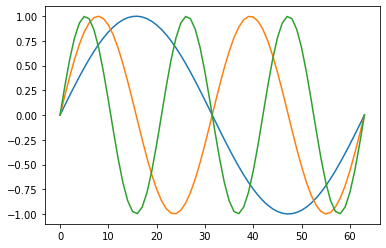

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = 64
xs = np.linspace(0, 1, n) * 2 * np.pi

sinx = np.sin(xs)
plt.plot(sinx)

sin2x = np.sin(2*xs)
plt.plot(sin2x)

sin3x = np.sin(3*xs)
plt.plot(sin3x)

# 正弦波の整数倍角は線形独立。それらの内積はおおむね 0 (直交性)
print(
    sinx.dot(sin2x), 
    sinx.dot(sin3x),
    sin2x.dot(sin3x),
    sep="\n")

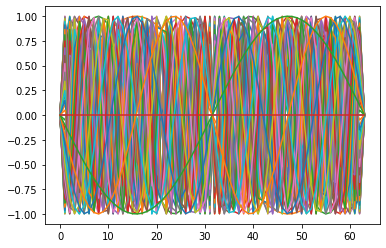

In [2]:
# いろいろな周期の正弦波(ストップウォッチ)を作る。
n = 64
xs = np.linspace(0, 1, n) * 2 * np.pi
stopwatches = [np.sin(k*xs) for k in range(n)]

for s in stopwatches:
    plt.plot(s)
    
# すべての周期関数を張りそうな雰囲気ある。

In [11]:
# ちなみに全部直交してる。
from itertools import combinations

all(np.round(s1.dot(s2), 16) == .0
    for s1, s2 
    in combinations(stopwatches, 2)
    if (s1 != s2).all())

True

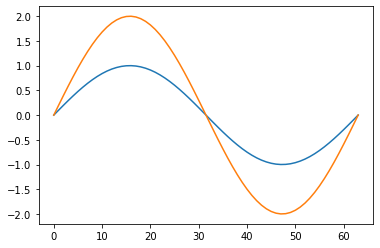

In [4]:
stopwatch_mat = np.stack(stopwatches, axis=1)

coordinate = np.repeat(0, n)

# sin(x)の正弦波だけの座標
coordinate[1] = 1

# 行列(ストップウォッチ)とベクトル(座標)の積で信号を表現できる。
s = stopwatch_mat.dot(coordinate)
plt.plot(s)

# 振幅を二倍にしてみる。
coordinate[1] = 2
s = stopwatch_mat.dot(coordinate)
plt.plot(s)

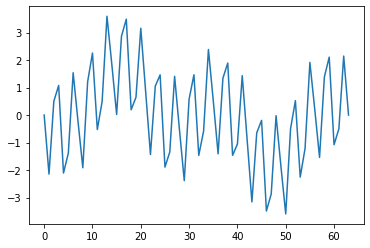

In [8]:
# いろいろな周期の正弦波を組み合わせてみる
coordinate = np.repeat(0, n)
coordinate[1] = 1
coordinate[3] = -1
coordinate[45] = 2
plt.plot(stopwatch_mat.dot(coordinate))

[ -9   9   9  -3  -1  -4   9  -9   7  -8  -6   9  -1  -2   9   6 -10   8
   8   8   7   9   7   5   5  -2   3  -4   0   5 -10   2  -5  -8   2   0
  -6   4  -7   6 -10  -4   9   4  -8   7   5  -4   4   9  -9  -1  -1   2
   3  -5  -5   9   5   7   9   2  -5  -9]


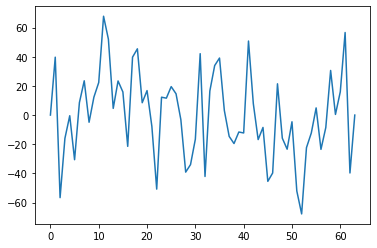

In [9]:
# ランダムな座標は「ノイズ」となる

coordinate = np.random.randint(-10, 10, n)
print(coordinate)
plt.plot(stopwatch_mat.dot(coordinate))